<a href="https://colab.research.google.com/github/SaraAzimiGit/AppFiltered/blob/main/BEBBC_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Number of rows: 15
Number of columns: 129


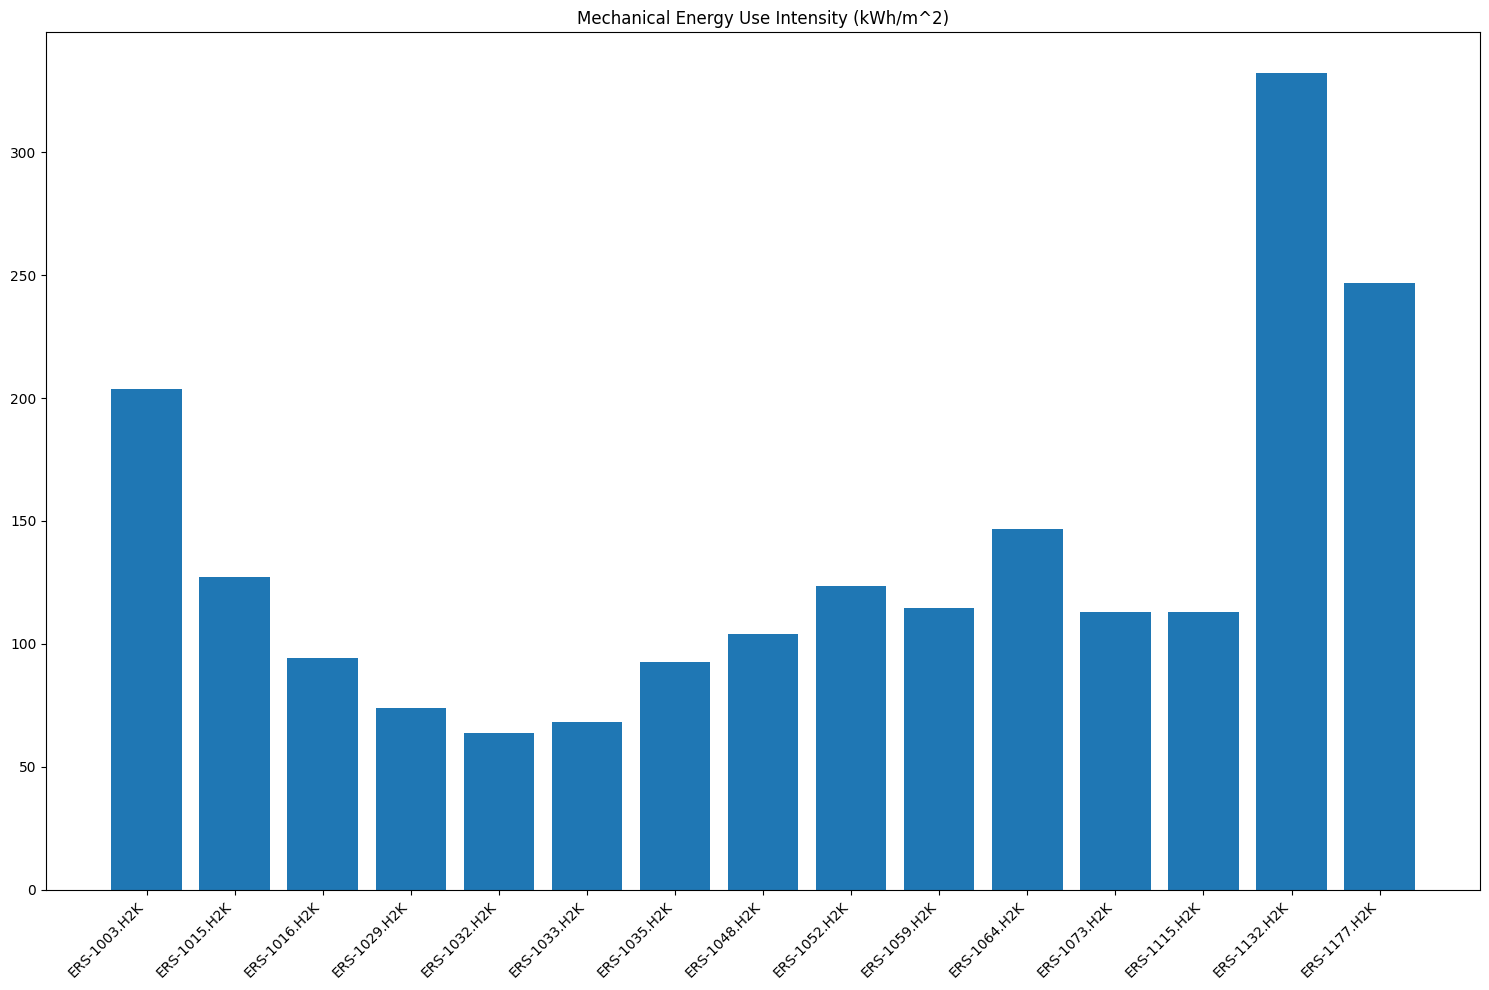

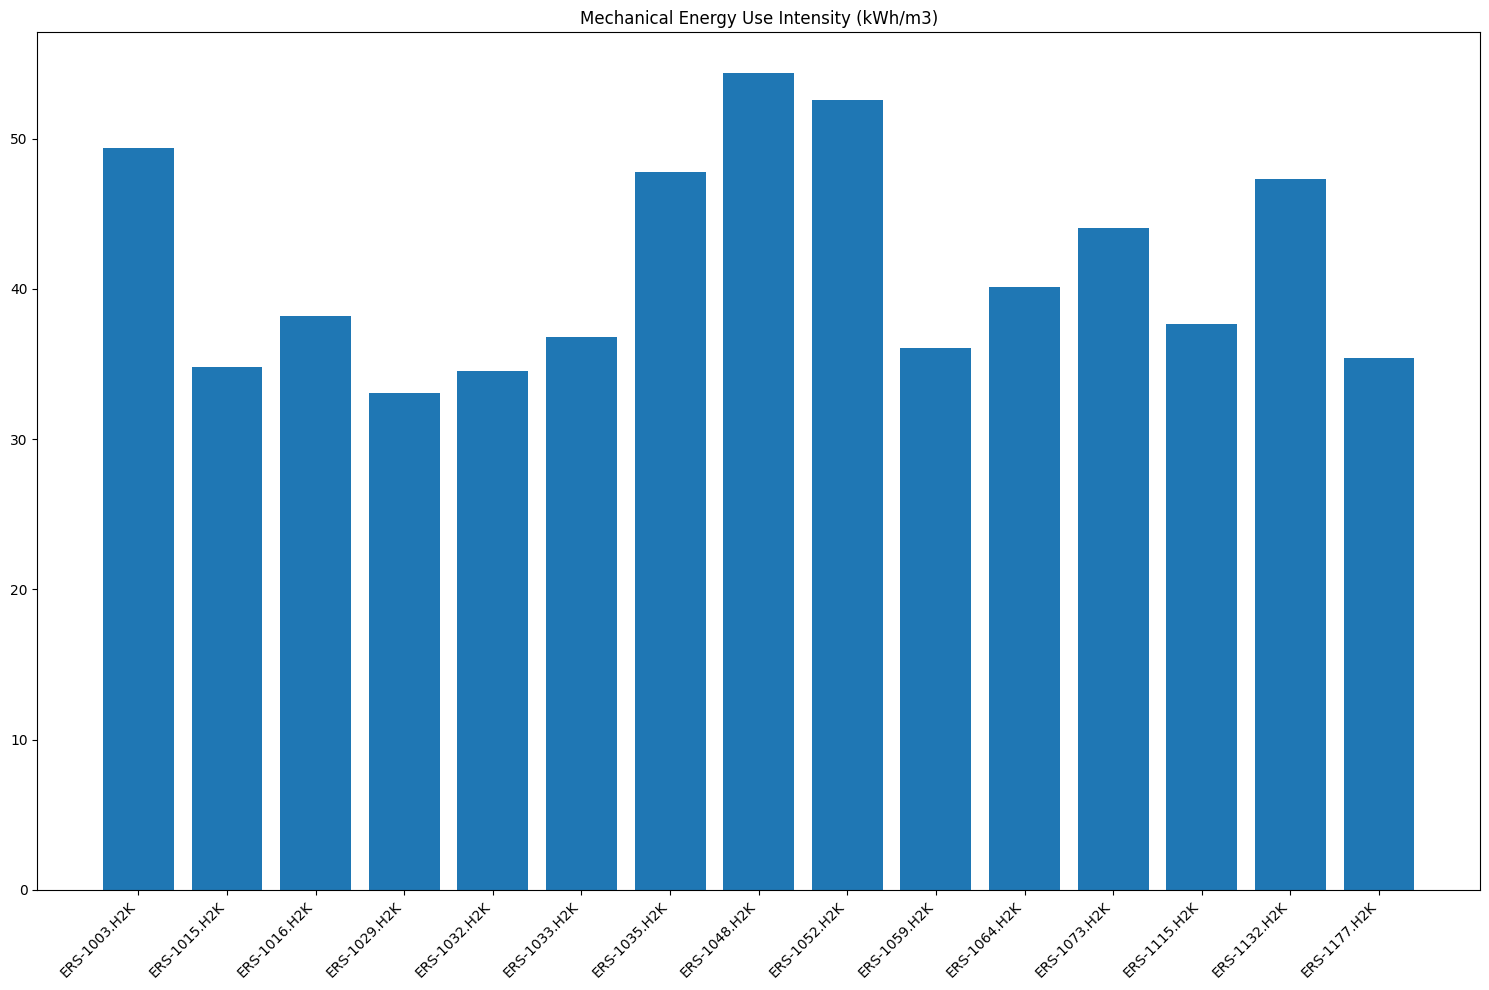

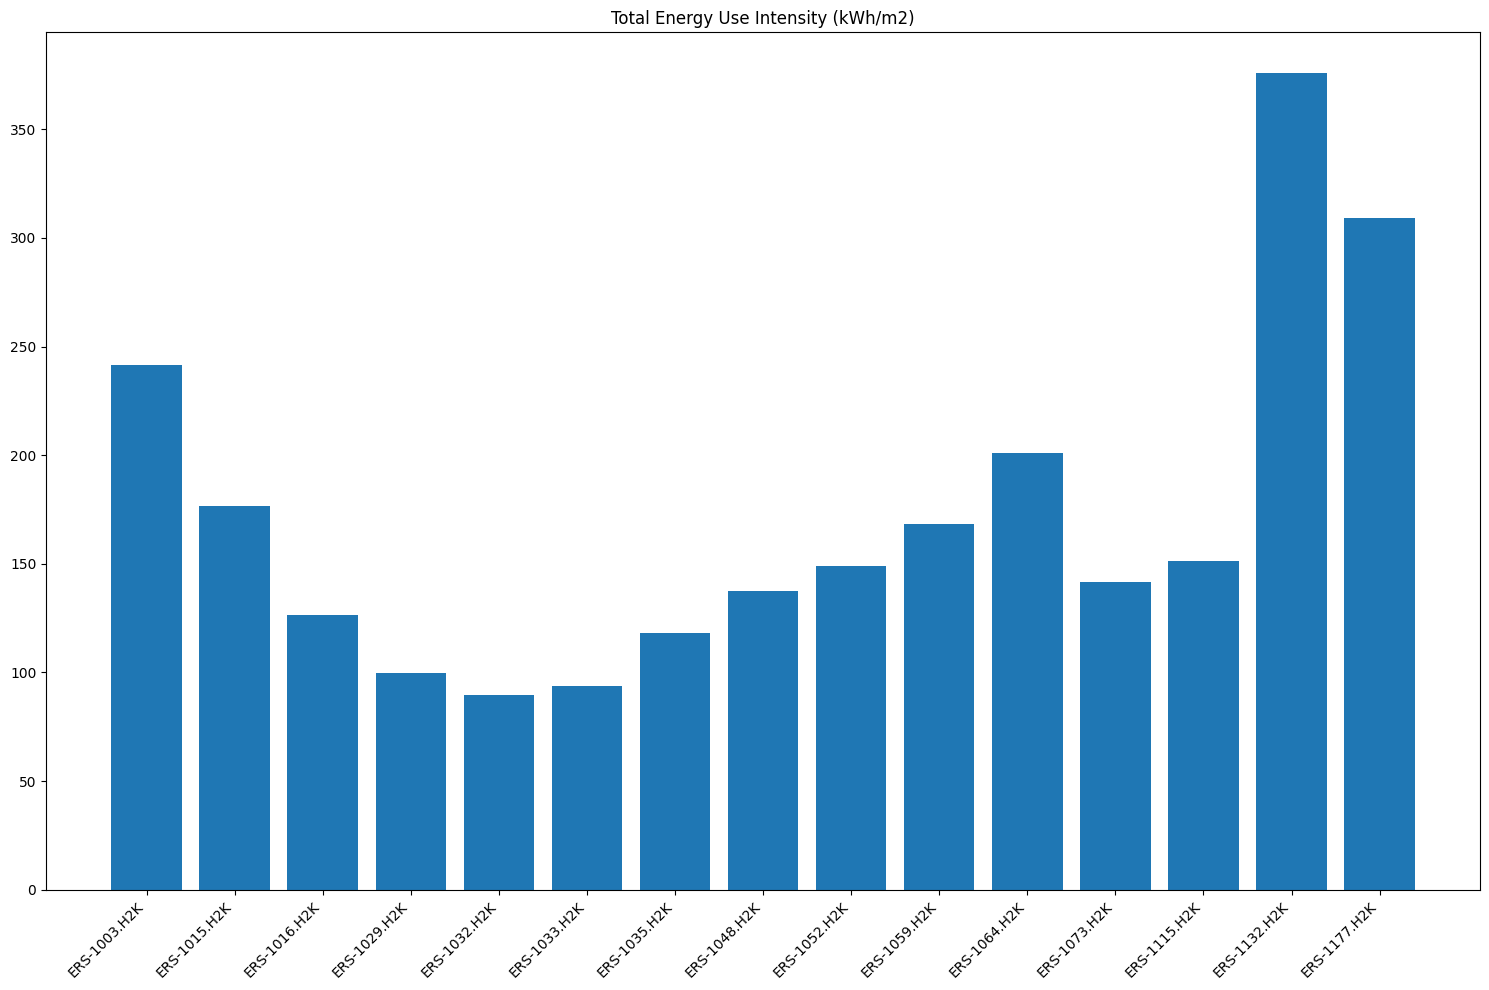

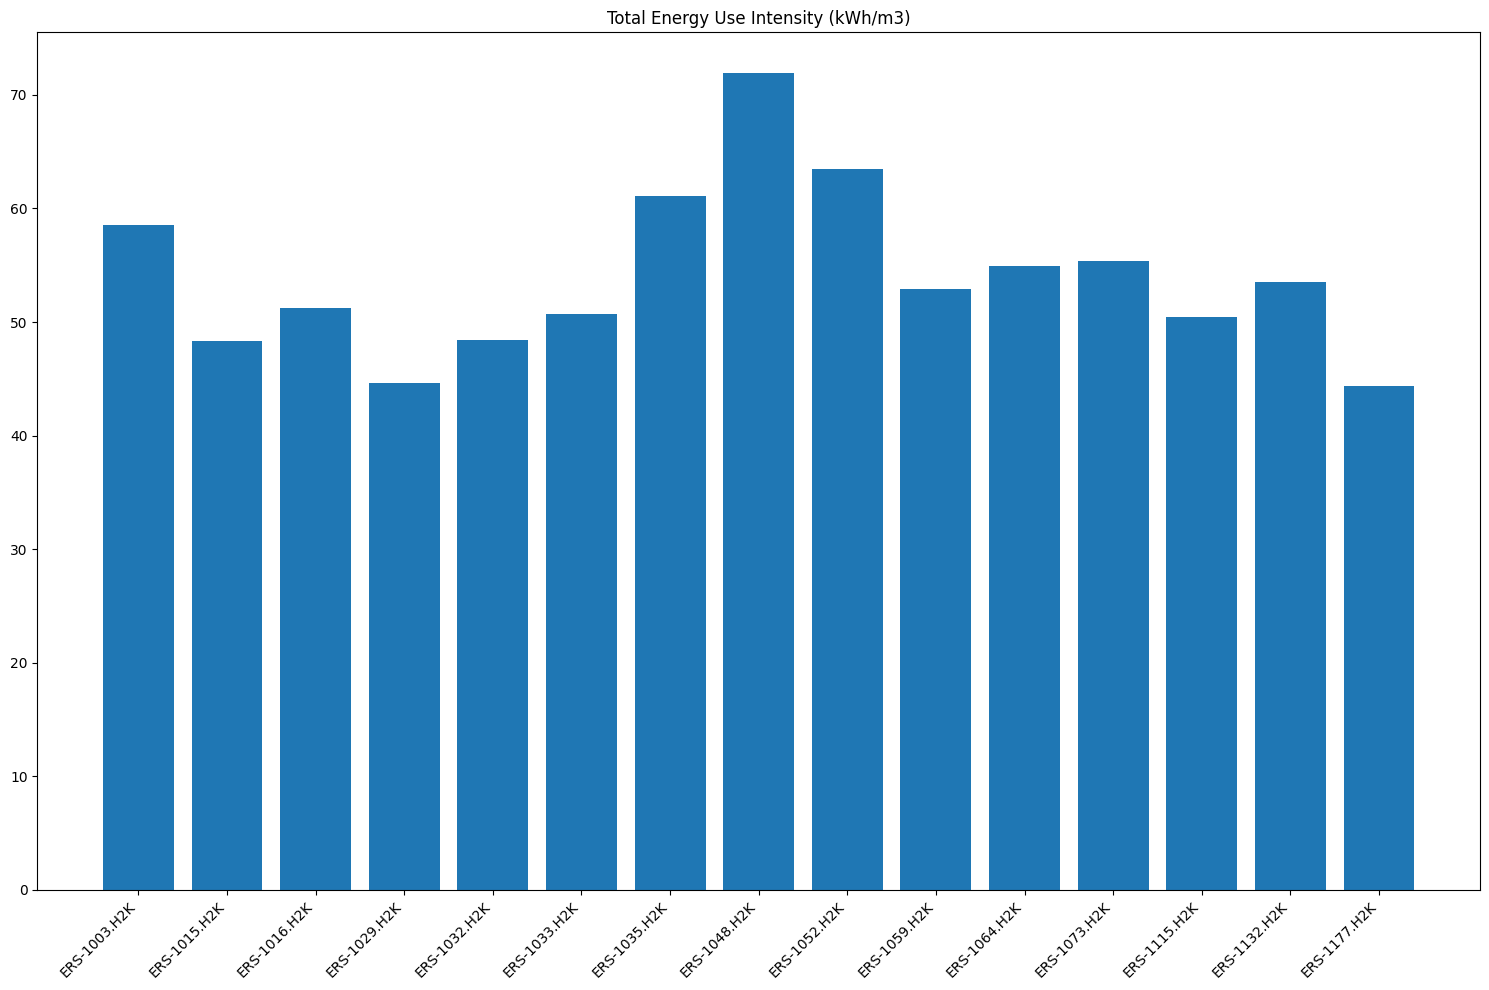

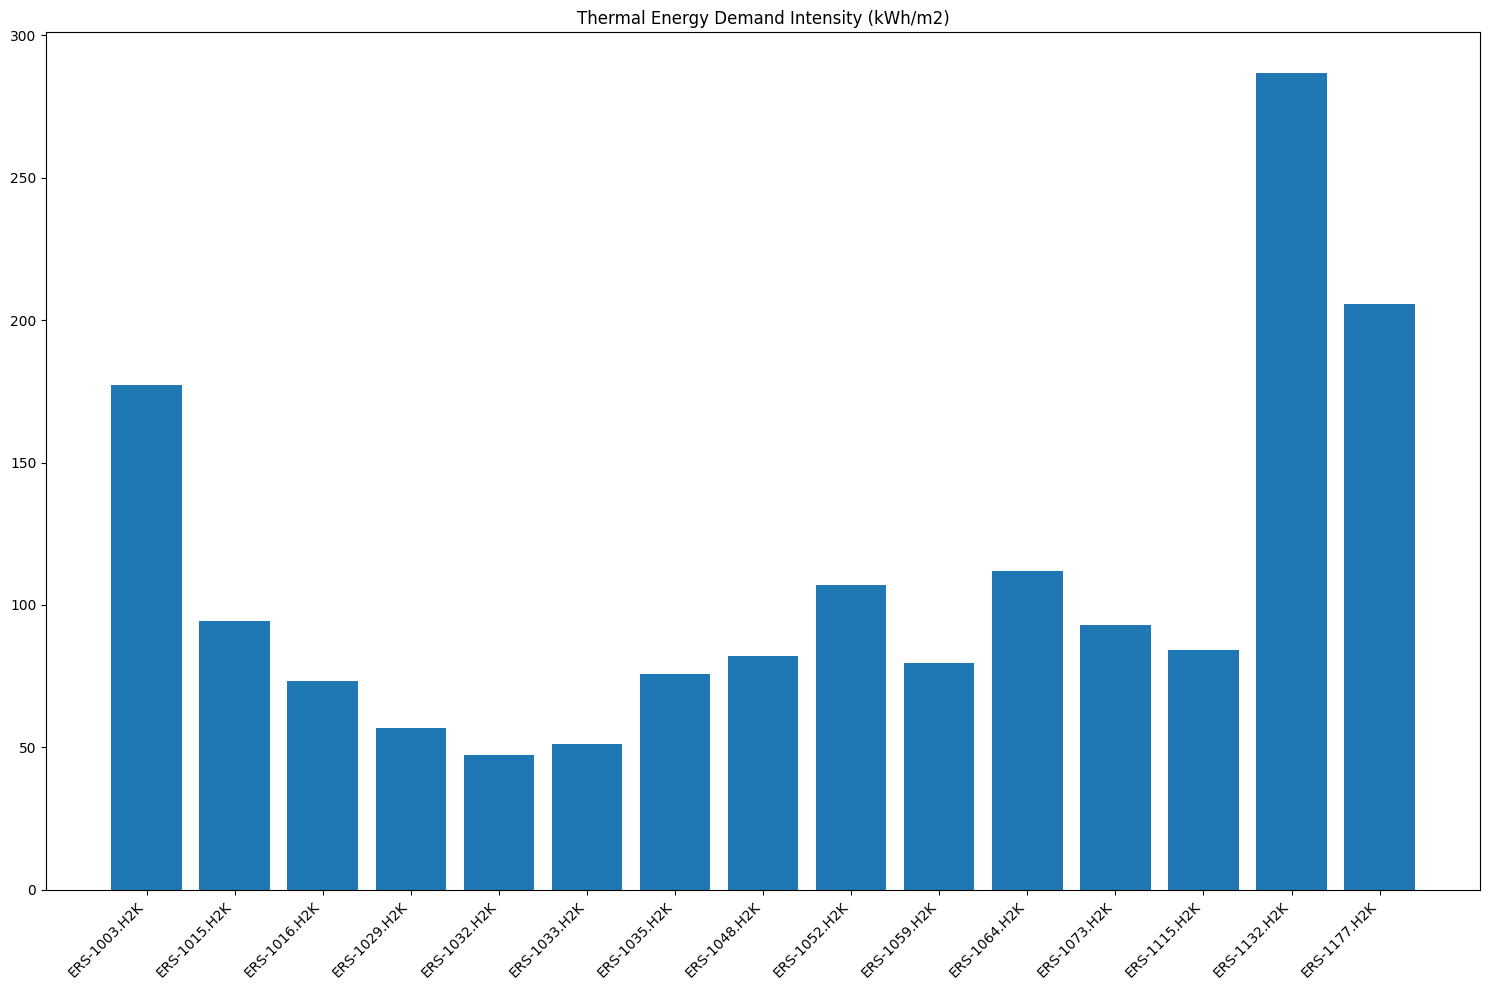

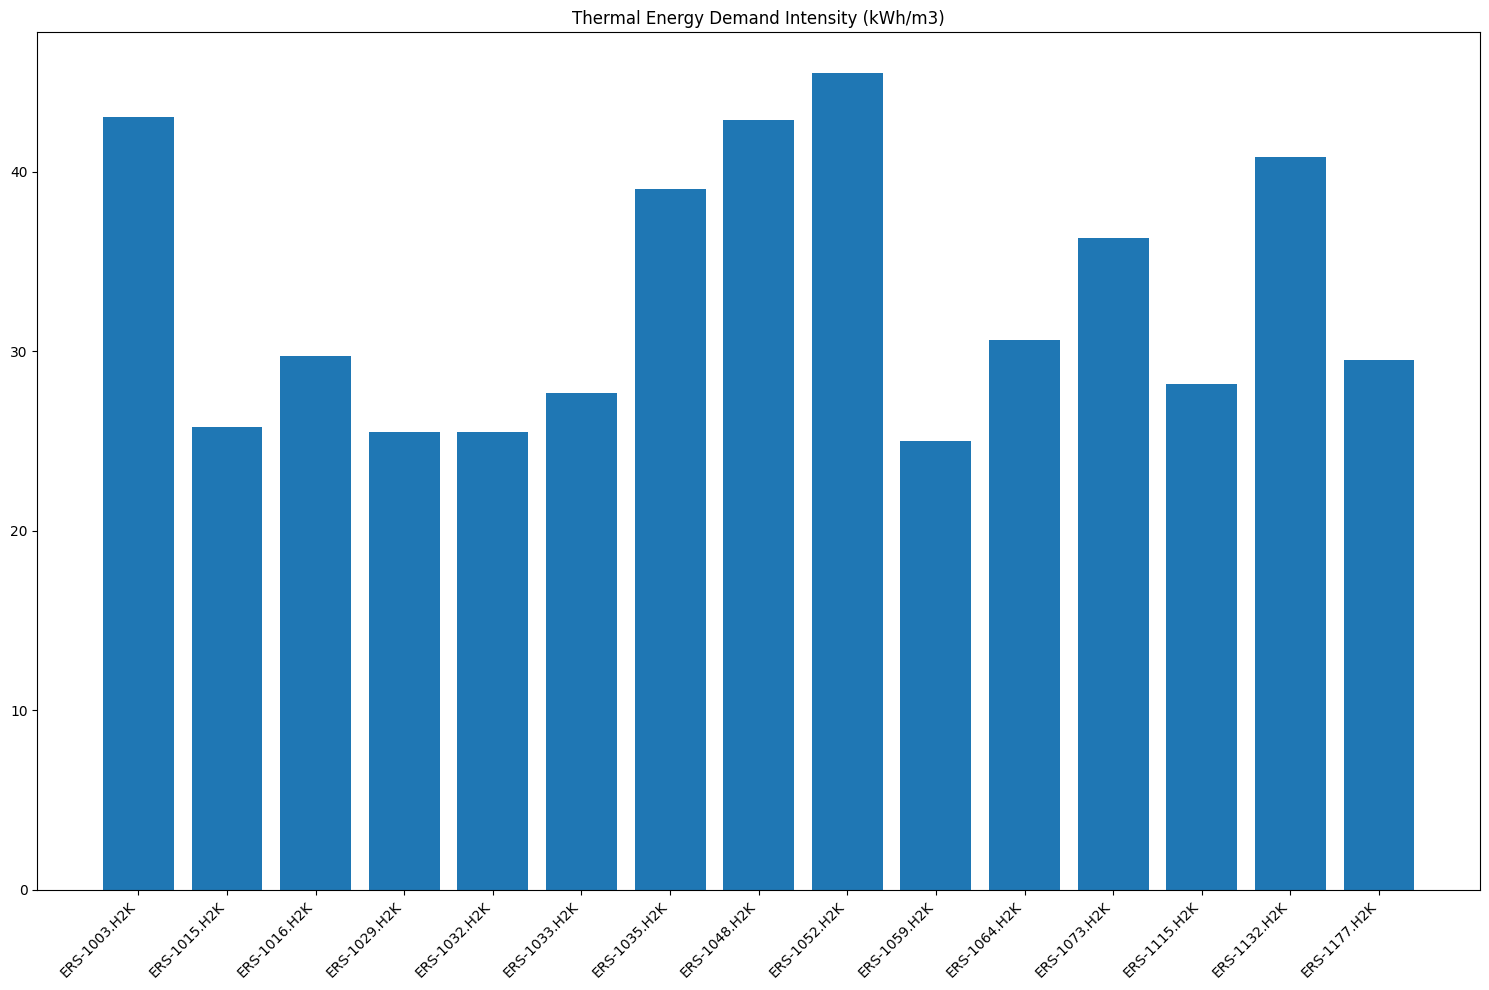

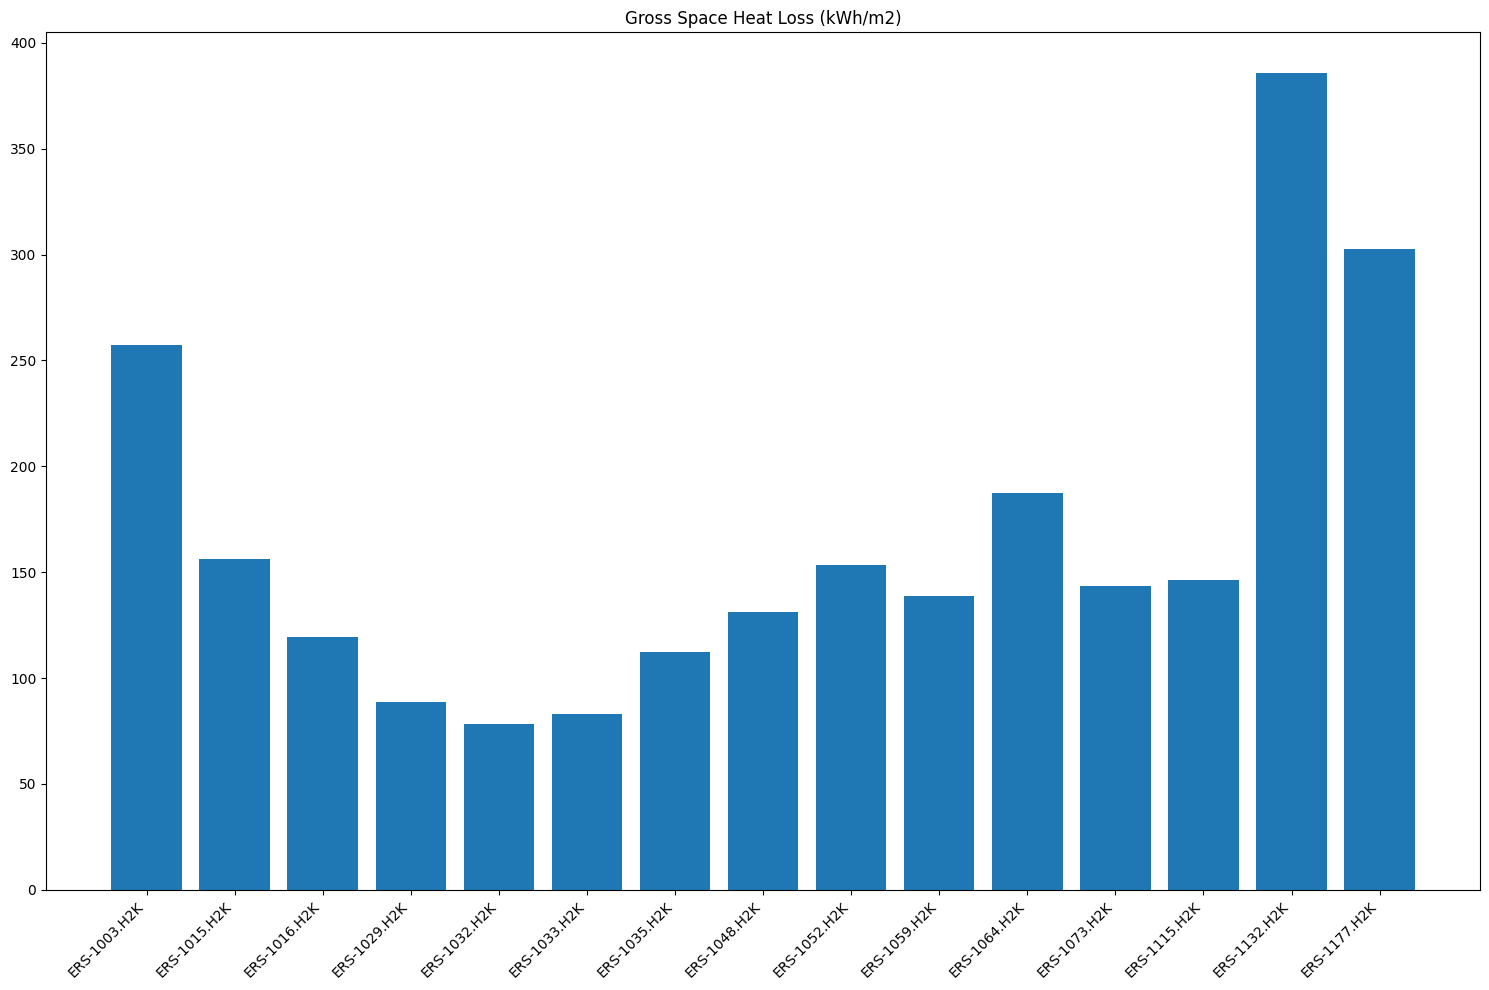

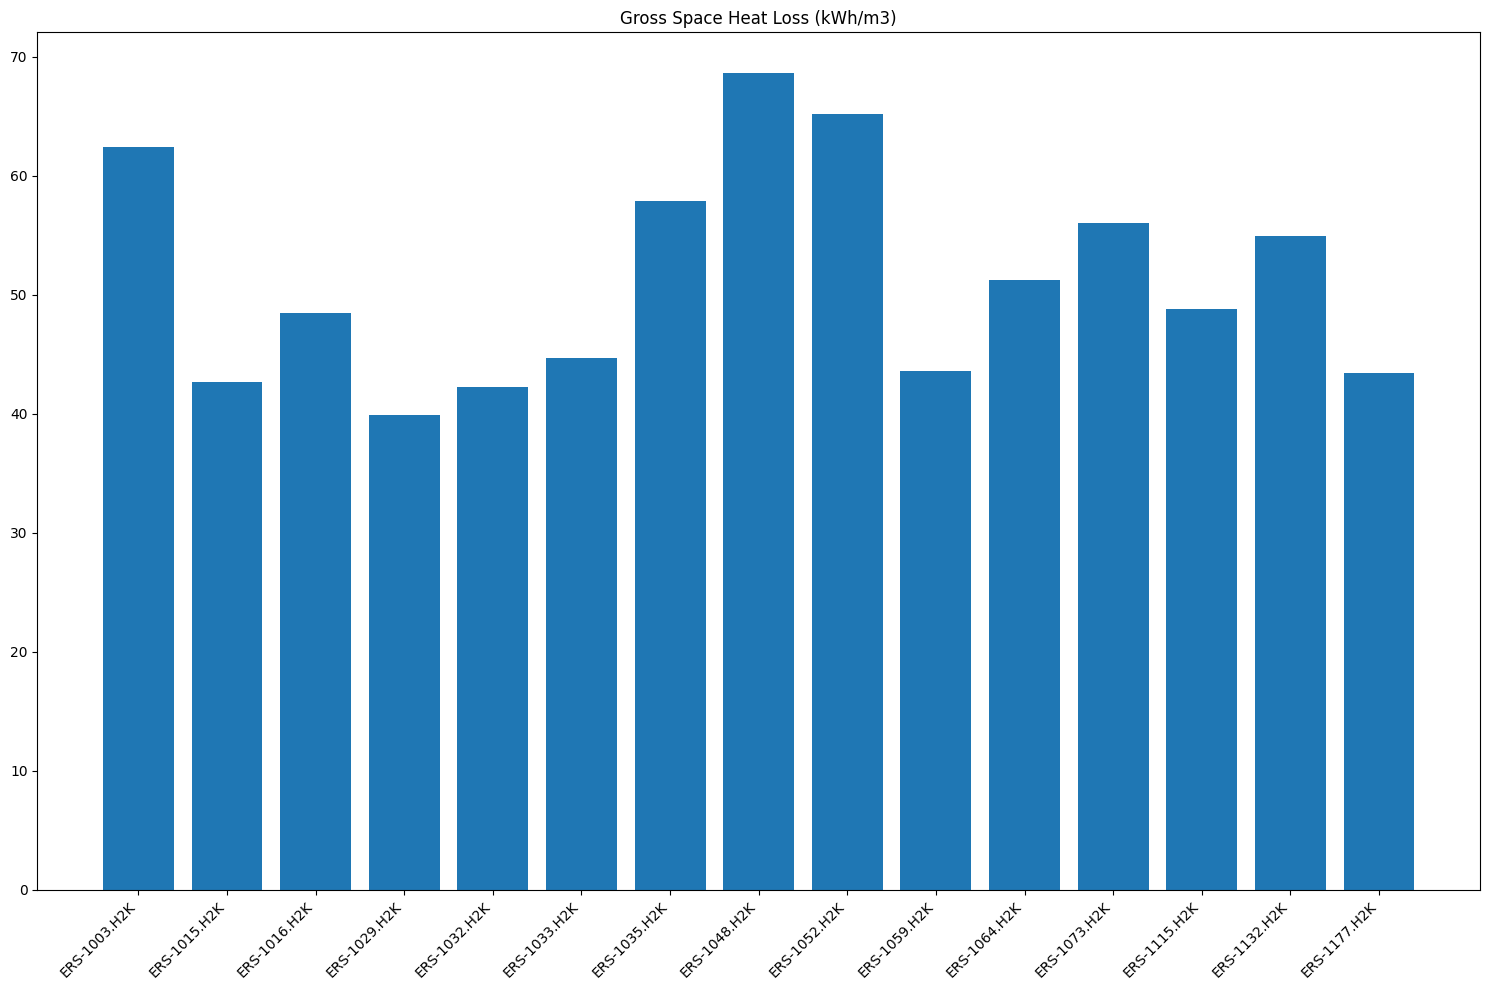

Number of rows: 12
Number of columns: 129


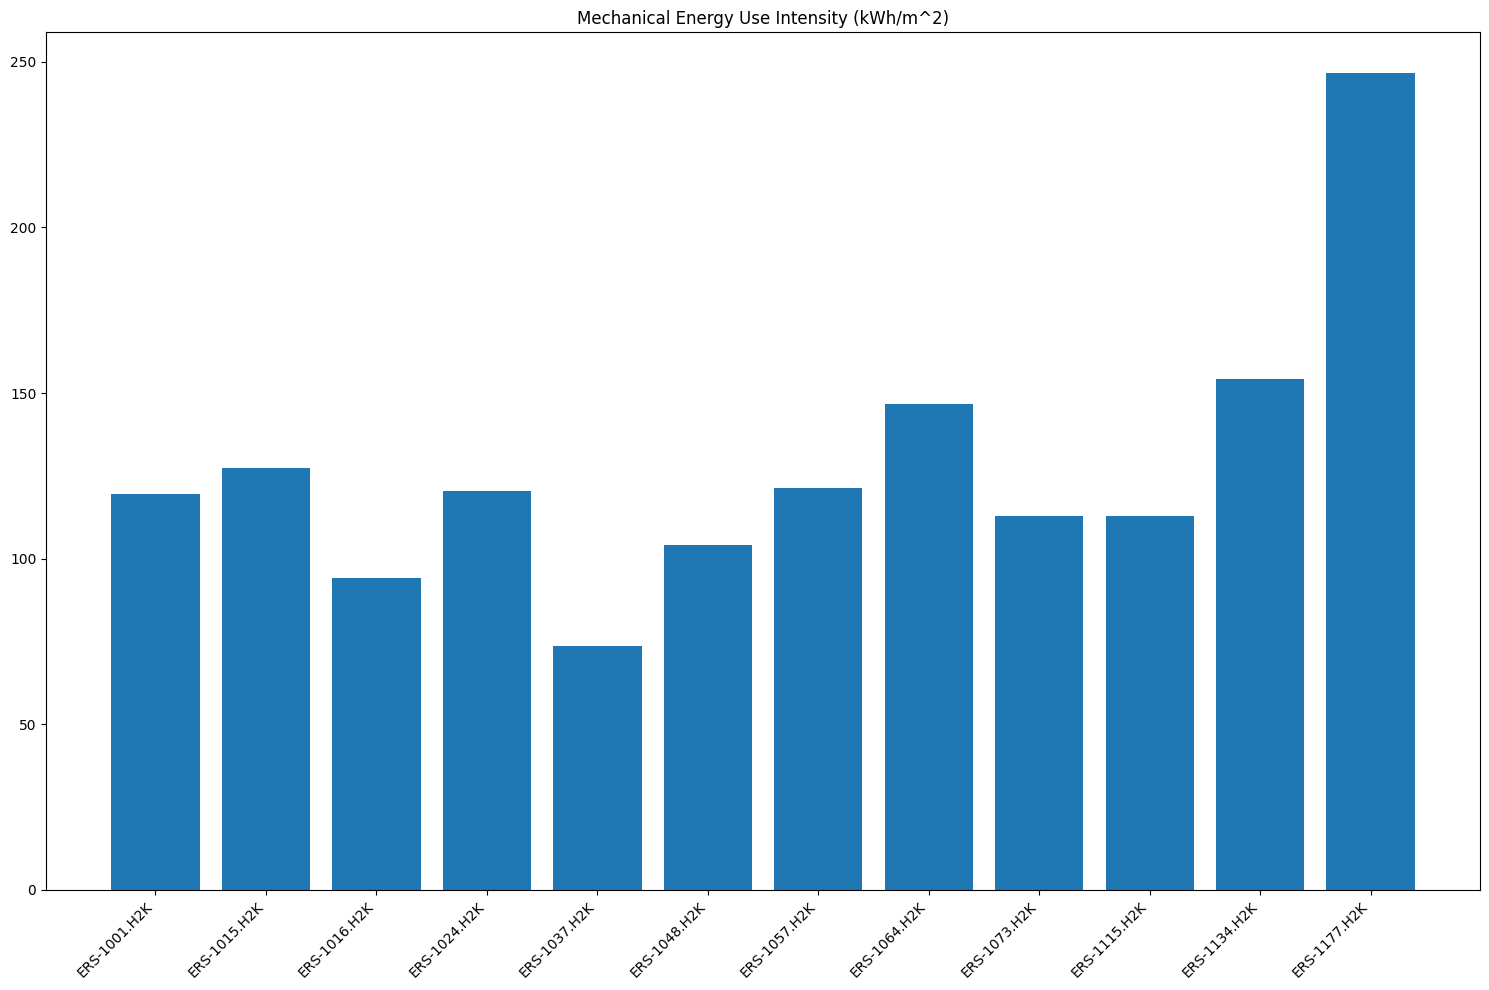

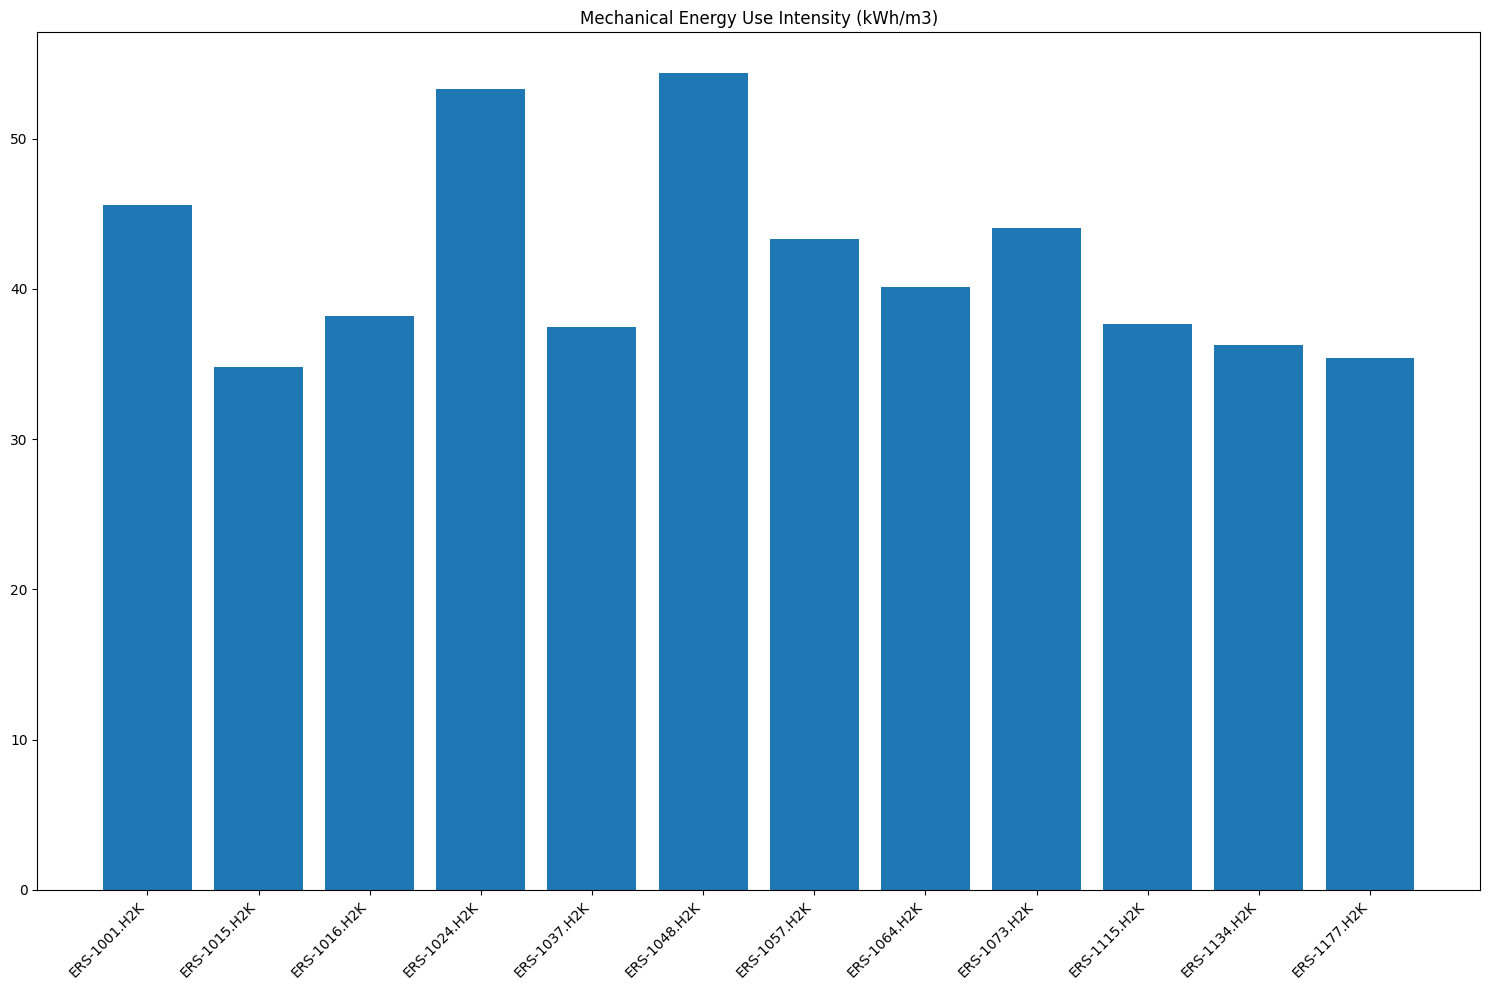

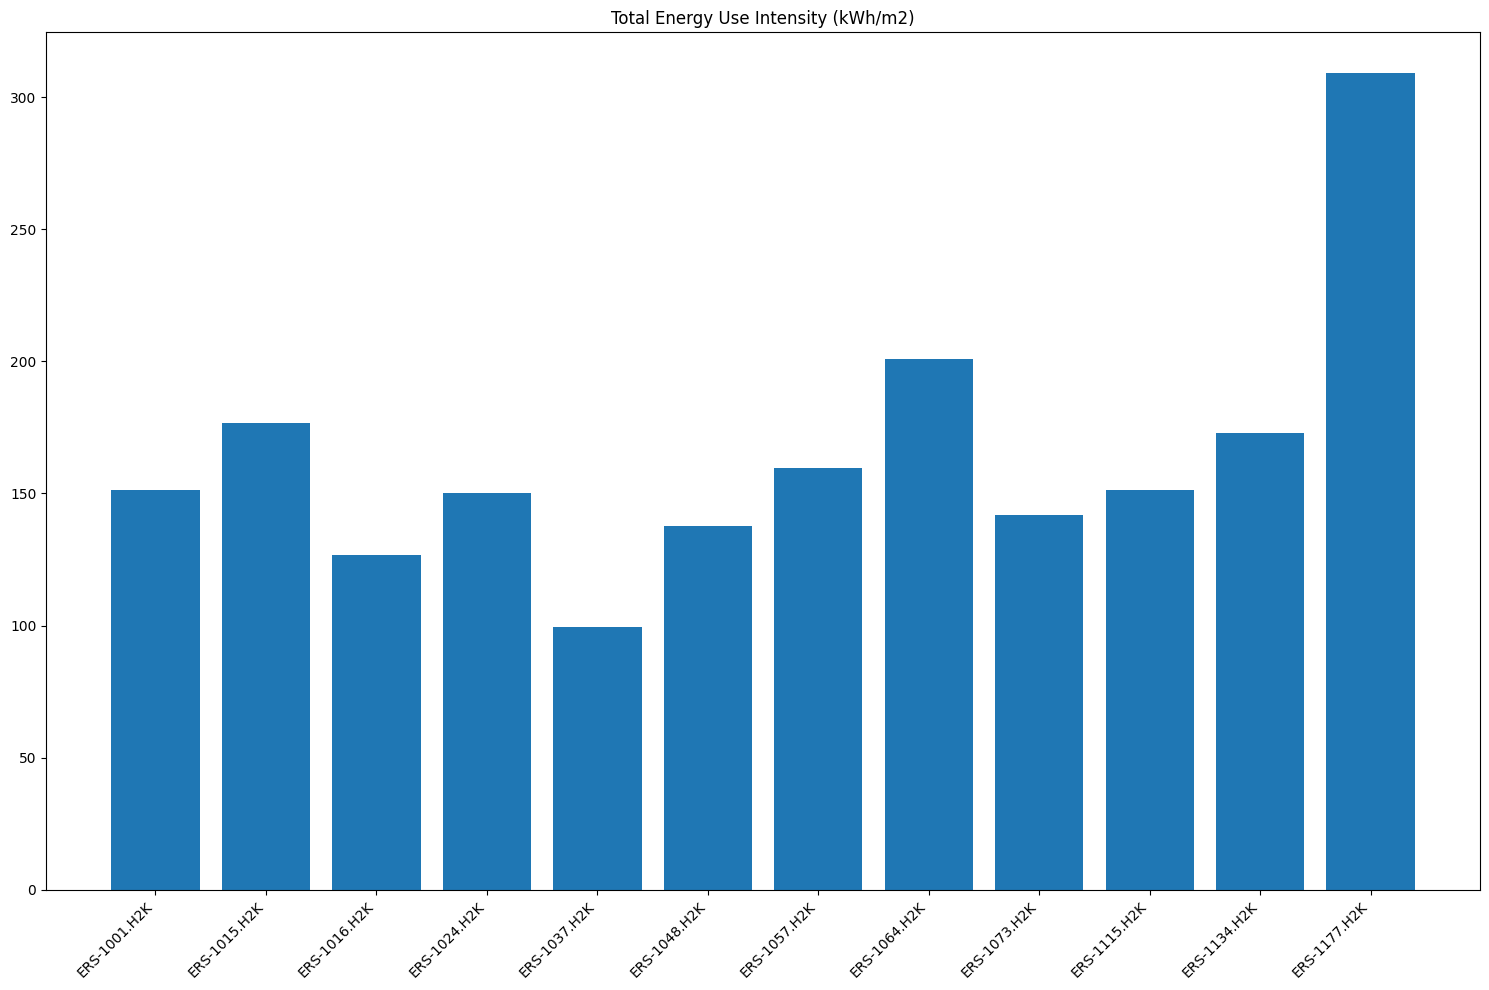

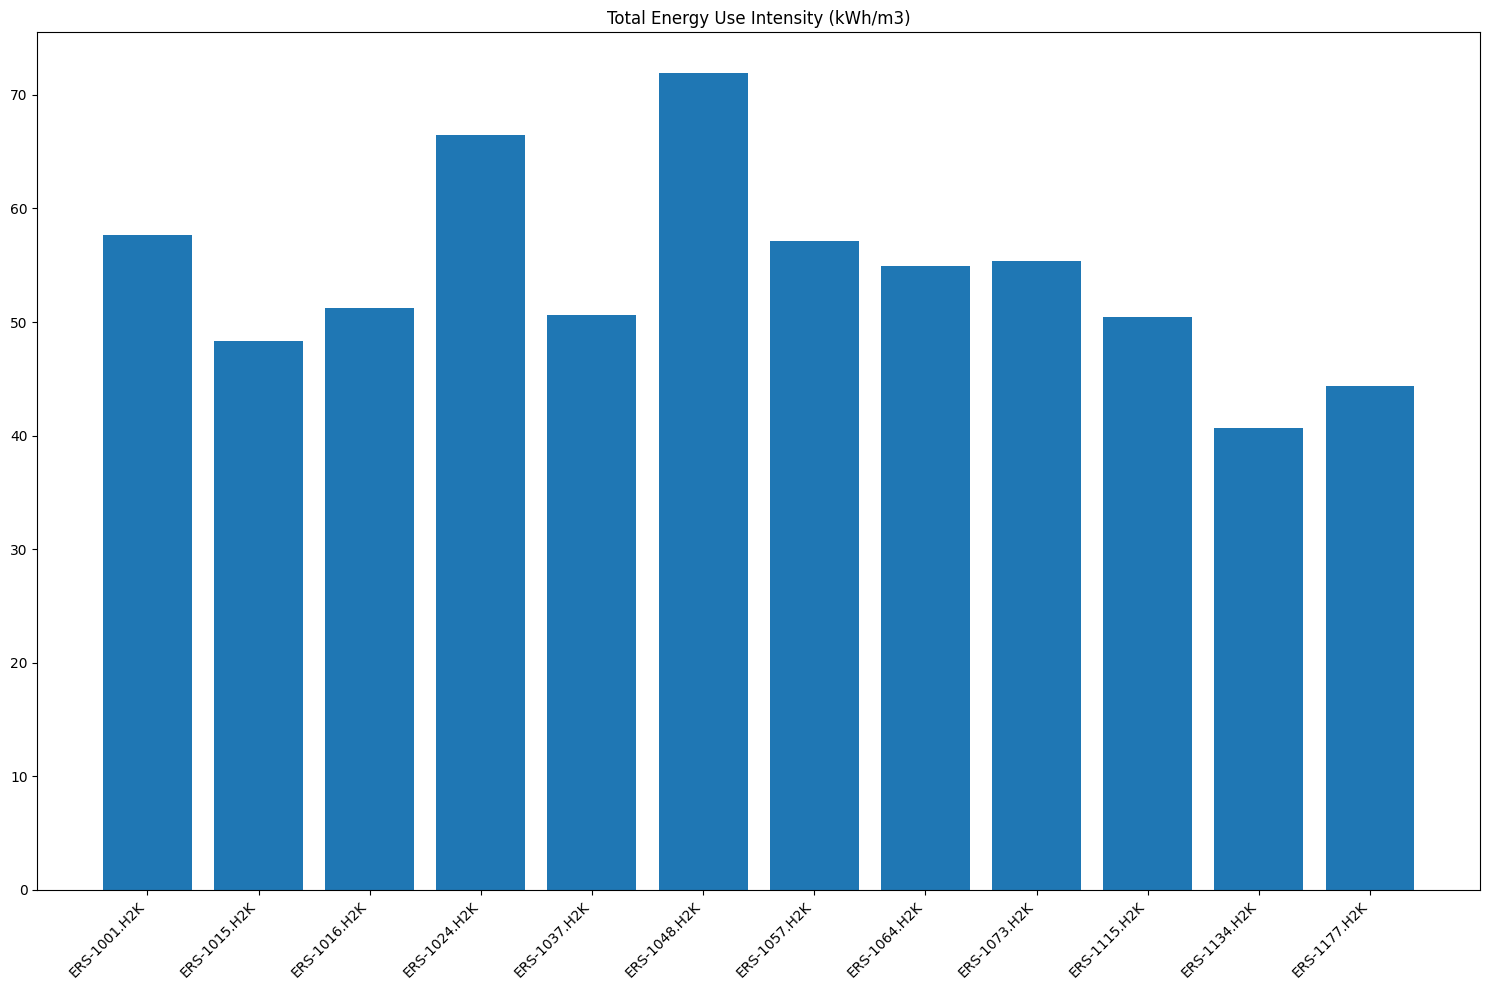

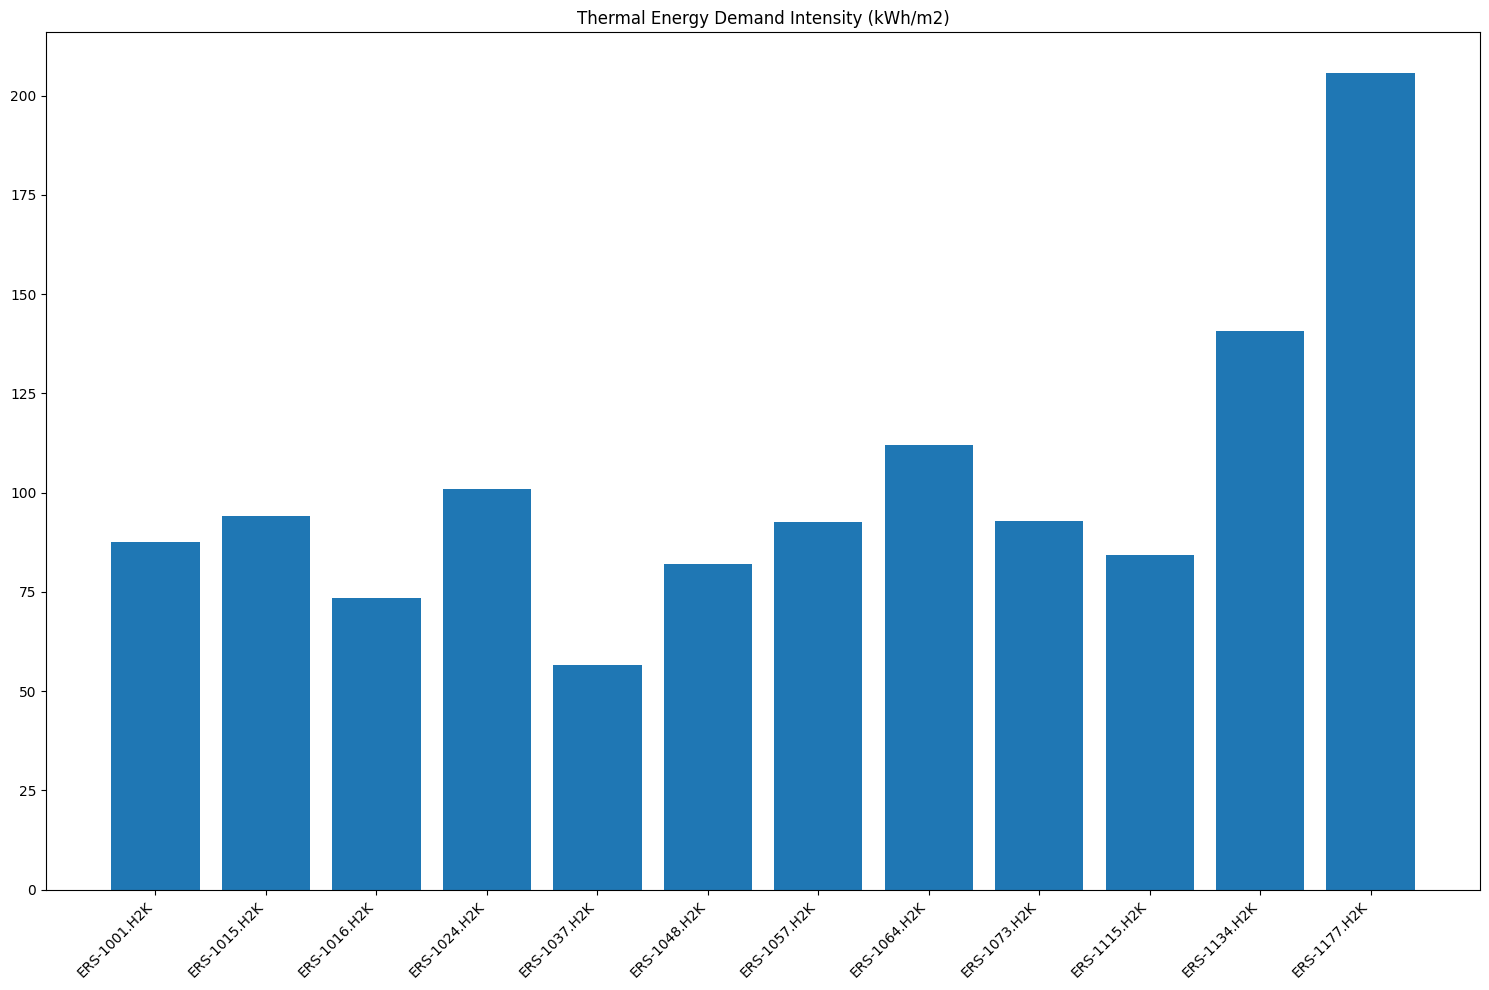

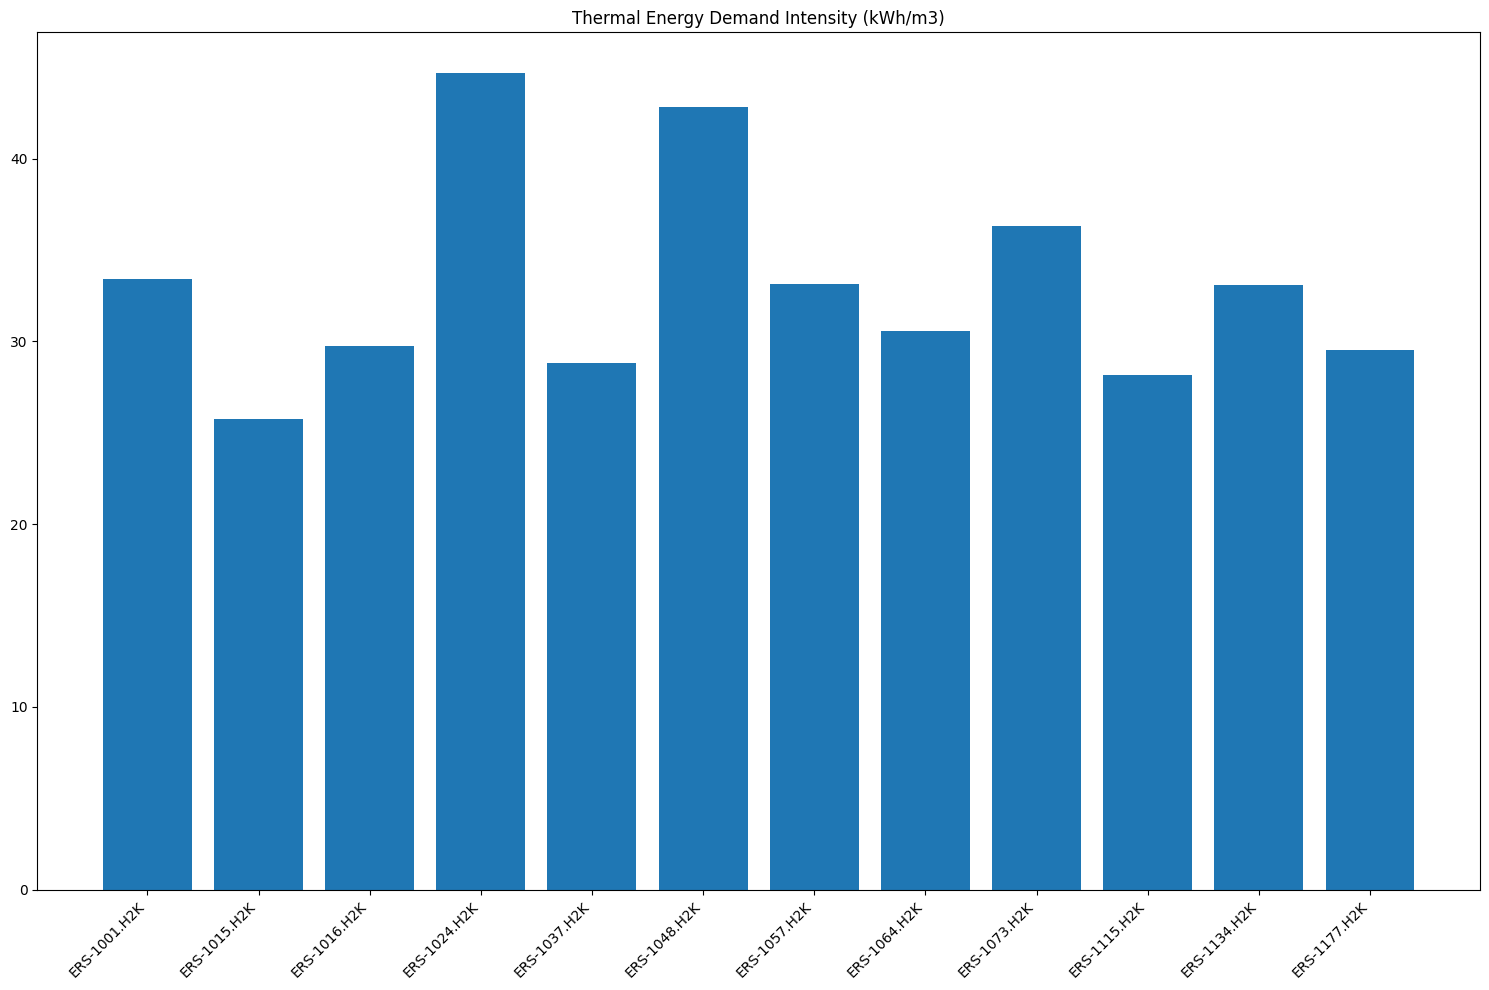

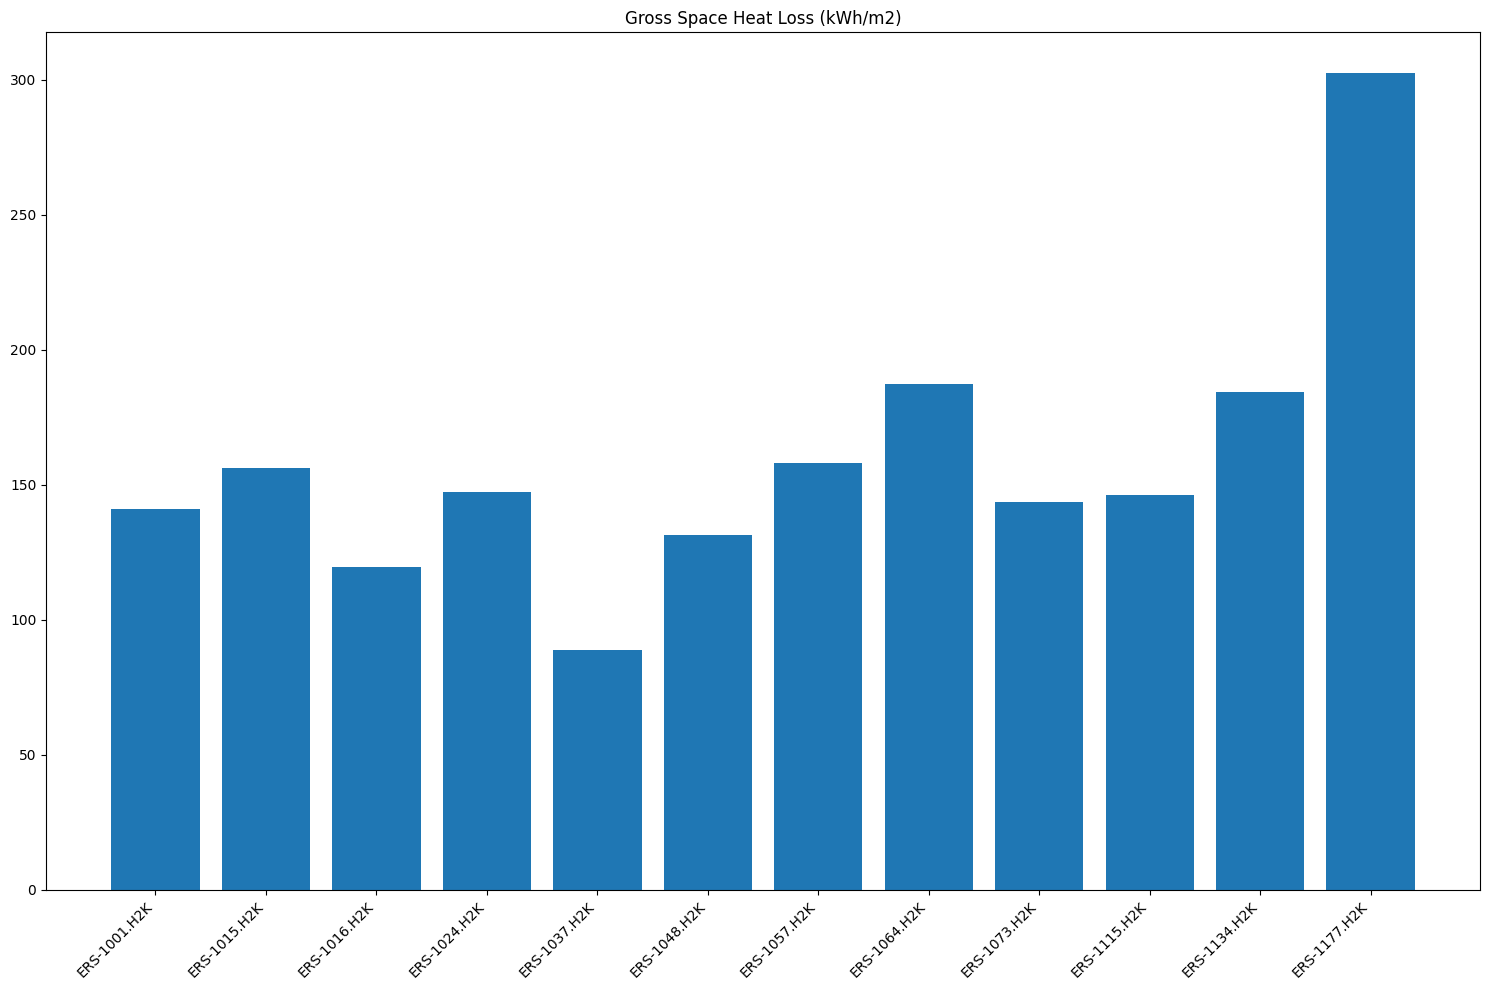

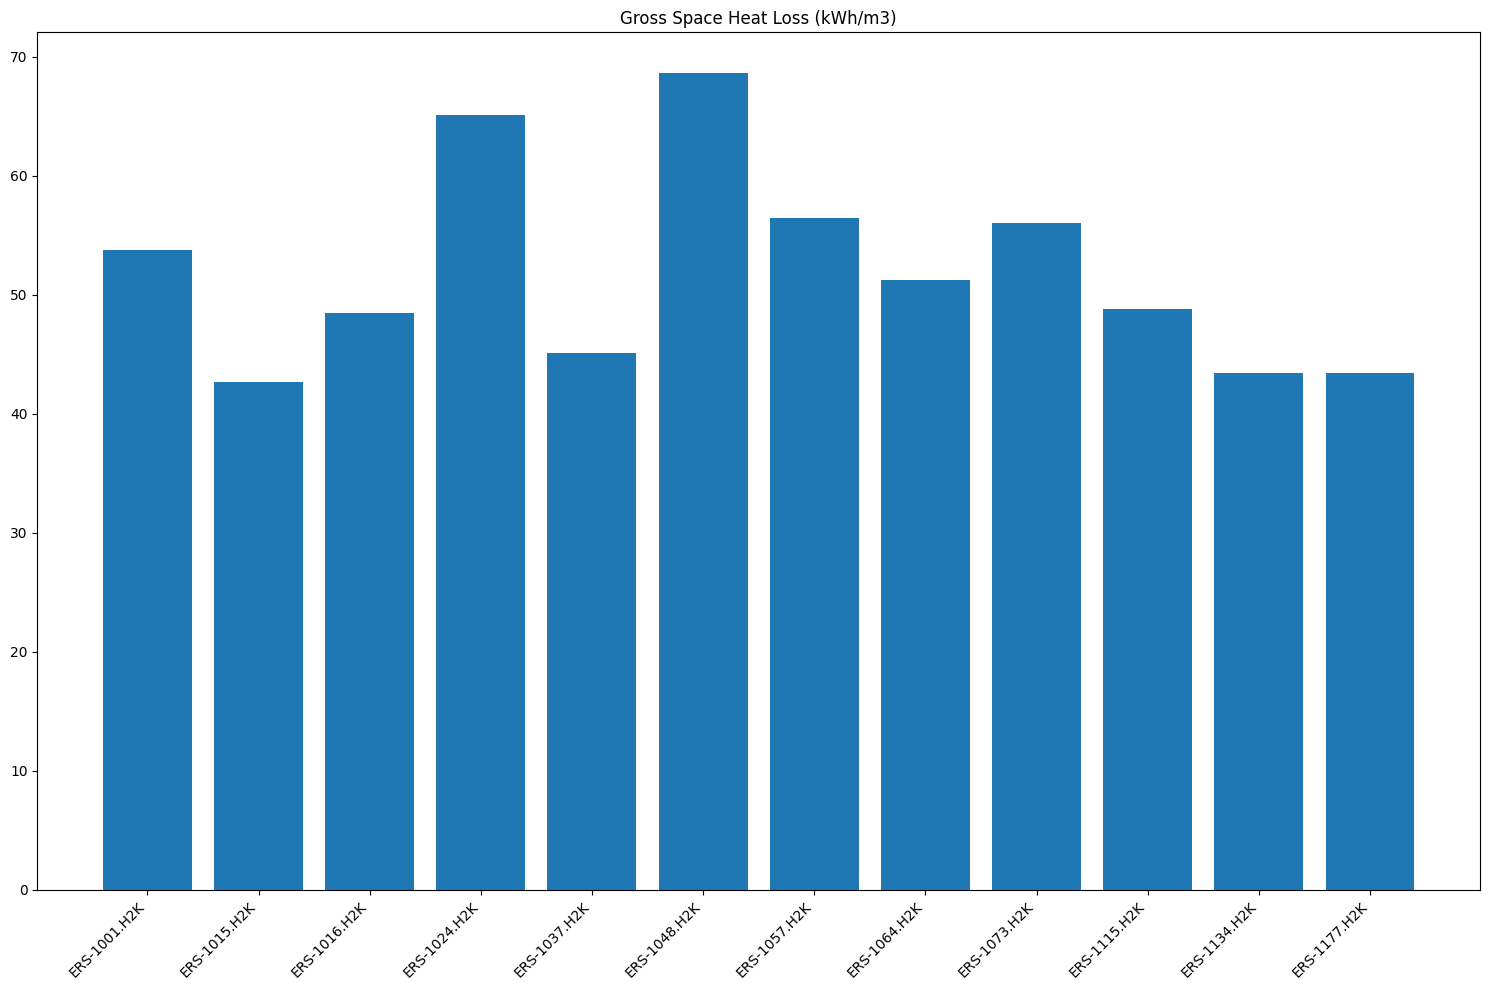

Number of rows: 28
Number of columns: 129


TypeError: ignored

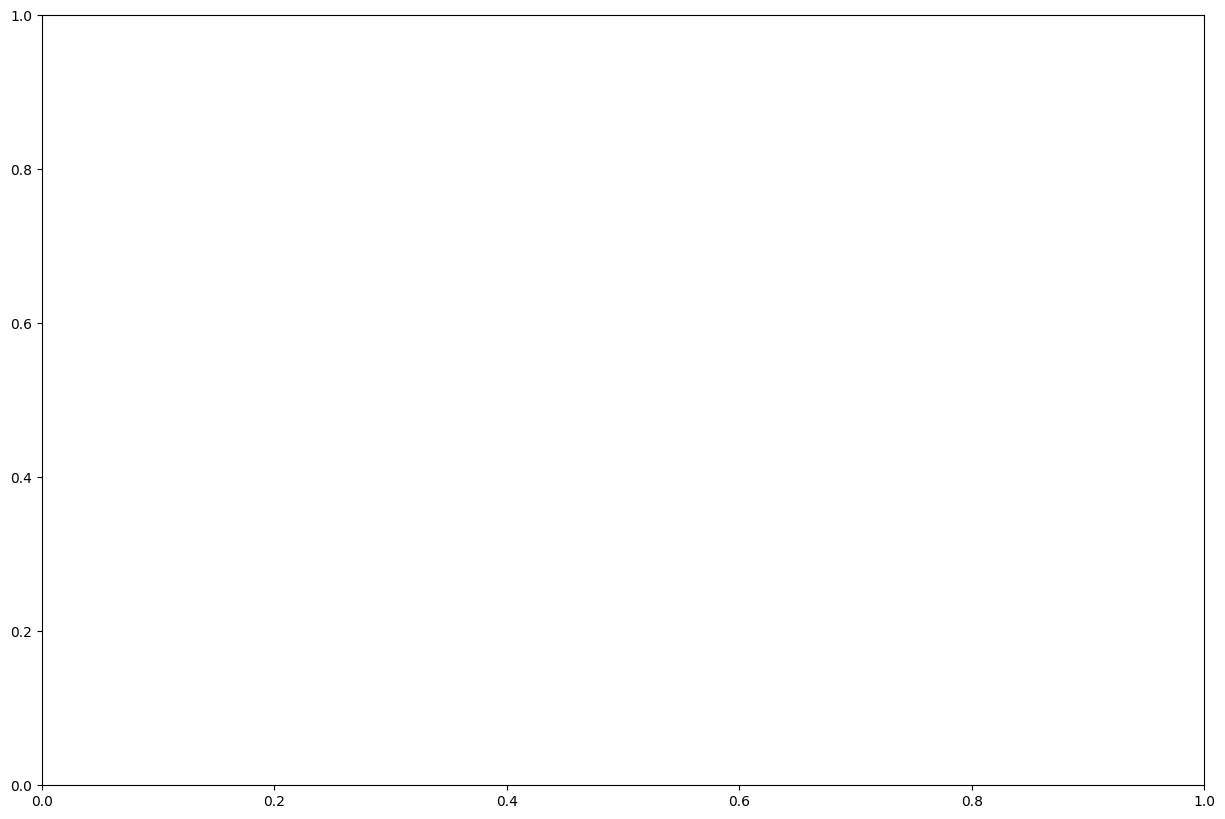

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory path where the Excel files are located
dir_path = '/content/drive/MyDrive/NRCAN_data/BEBBC_data'
# Loop through all the Excel files in the directory
for file_name in os.listdir(dir_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(dir_path, file_name)
        # Read the Excel file
        df= pd.read_excel(file_path, engine='openpyxl')
        #df_new= pd.read_excel(file_path, engine='openpyxl',usecols=['ref_house|regulatedEnergyUseGJ', 'archetype|Floor-Area-m2','archetype|House-Volume-m3','ref_house|EnergyEquipmentGJ','ref_house|auxEnergyHeatingGJ','ref_house|HeatLossGrossEnvelopeGJ','archetype|AreaWeighted-Uvalue-incl-Infiltration-W-per-m2K'])
       
        # Print the number of rows and columns in the DataFrame
        print(f'Number of rows: {df.shape[0]}')
        print(f'Number of columns: {df.shape[1]}')

        #for col_name in df.keys(): 
          #print(col_name)

        MEUI_kwh_m2=(df['ref_house|regulatedEnergyUseGJ']*277.778)/df['archetype|Floor-Area-m2']
        MEUI_kwh_m3=(df['ref_house|regulatedEnergyUseGJ']*277.778)/df['archetype|House-Volume-m3']
        TEUI_kwh_m2=((df['ref_house|regulatedEnergyUseGJ']+df['ref_house|EnergyEquipmentGJ'])*277.778)/df['archetype|Floor-Area-m2']
        TEUI_kwh_m3=((df['ref_house|regulatedEnergyUseGJ']+df['ref_house|EnergyEquipmentGJ'])*277.778)/df['archetype|House-Volume-m3']
        TEDI_kwh_m2=(df['ref_house|auxEnergyHeatingGJ']*277.778)/df['archetype|Floor-Area-m2']
        TEDI_kwh_m3=(df['ref_house|auxEnergyHeatingGJ']*277.778)/df['archetype|House-Volume-m3']
        Gross_heat_loss_kwh_m2=(df['ref_house|HeatLossGrossEnvelopeGJ']*277.778)/df['archetype|Floor-Area-m2']
        Gross_heat_loss_kwh_m3=(df['ref_house|HeatLossGrossEnvelopeGJ']*277.778)/df['archetype|House-Volume-m3']
        h2k_file=df['archetype|h2k-File']

        data=list(zip(h2k_file,MEUI_kwh_m2,MEUI_kwh_m3,TEUI_kwh_m2,TEUI_kwh_m3,TEDI_kwh_m2,TEDI_kwh_m3,Gross_heat_loss_kwh_m2,Gross_heat_loss_kwh_m3))
        df_metric = pd.DataFrame(data, columns=['Arechytpe|h2k-file', 'Mechanical Energy Use Intensity (kWh/m^2)','Mechanical Energy Use Intensity (kWh/m3)','Total Energy Use Intensity (kWh/m2)','Total Energy Use Intensity (kWh/m3)','Thermal Energy Demand Intensity (kWh/m2)','Thermal Energy Demand Intensity (kWh/m3)','Gross Space Heat Loss (kWh/m2)','Gross Space Heat Loss (kWh/m3)'])

        for metric in df_metric.columns[1:]:
          x_values=df_metric['Arechytpe|h2k-file']
          plt.figure(figsize=(15,10))
          plt.bar(x=x_values,height=df_metric[metric])
          plt.title(metric)
          plt.xticks(rotation=45, ha='right')
          plt.tight_layout()  # Optional, to improve the spacing and layout of the plot
          plt.show()  # Optional, to display the plot
          #plt.xlabel(df['archetype|h2k-File'].unique()[0])
          #plt.ylabel('KWh/m2')
          #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [4]:
df_metric.head()

,Arechytpe|h2k-file,Mechanical Energy Use Intensity (kWh/m^2),Mechanical Energy Use Intensity (kWh/m3),Total Energy Use Intensity (kWh/m2),Total Energy Use Intensity (kWh/m3),Thermal Energy Demand Intensity (kWh/m2),Thermal Energy Demand Intensity (kWh/m3),Gross Space Heat Loss (kWh/m2),Gross Space Heat Loss (kWh/m3)
0,ERS-1003.H2K,203.492426,49.361436,241.492463,58.579156,177.348906,43.019766,257.367082,62.429884
1,ERS-1015.H2K,127.372460,34.827548,176.730344,48.323512,94.207993,25.759363,156.081130,42.677382
2,ERS-1016.H2K,94.195441,38.166471,126.517907,51.263013,73.366184,29.726793,119.513709,48.425025
3,ERS-1029.H2K,73.769390,33.101885,99.529097,44.660810,56.827064,25.499505,88.864809,39.875519
4,ERS-1032.H2K,63.952755,34.519852,89.712461,48.424199,47.280958,25.520897,78.266792,42.246157


In [5]:
import pandas as pd
import os

# Directory containing the Excel files
directory = '/content/drive/MyDrive/NRCAN_data/BEBBC_data'

# List all Excel files in the directory
file_list = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

# Initialize an empty DataFrame to store the concatenated data
combined_data = pd.DataFrame()

# Loop over each Excel file
for file in file_list:
    # Read the data from the Excel file
    data = pd.read_excel(os.path.join(directory, file))
    
    # Append a blank row to separate the data
    blank_row = pd.DataFrame('', index=[0], columns=data.columns)
    data = pd.concat([data, blank_row], ignore_index=True)
    
    # Append the data to the combined DataFrame
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Save the combined data to a new Excel file
combined_data.to_excel(os.path.join(directory, 'combined_data.xlsx'), index=False)
